# Exoplanetas

<img src=https://www.hpcf.upr.edu/~abel/phl/hec2/images/HEC_All_Distance.jpg>


**Miembros:**
- Roberto González
- Emilio Oyanedel
- Sebastián Vegas


## Definición del problema 

El observatorio espacial Kepler es un satélite construido por la NASA que fue lanzado el año 2009 dedicado a la búsqueda de exoplanetas en sistemas de estrellas cercanas a la nuestra, con el objetivo de posiblemente encontrar otro planeta habitable cercano al nuestro. La misión original terminó en 2013 por fallas mecánicas, sin embargo desde 2014 ha seguido funcionando.

Este dataset es un registro acumulado de las observaciones de objetos de interés de Kepler (en adelante KOI).

Actualmente, utilizando los datos del telescopio, resulta difícil determinar cuales de las observaciones corresponden efectivamente a exoplanetas, es por esto que la NASA utiliza 3 categorías, confirmados, candidatos y falsos positivos. Sin embargo, la categoría de candidatos no es de nuestro interés, por tanto nuestro objetivo será clasificar los datos como confirmado o falsos positivos

## Estadística descriptiva 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# from mlxtend.plotting import plot_decision_regions
import altair as alt
import os
from timeit import timeit
pd.set_option('display.max_columns', 999)
alt.data_transformers.enable('data_server')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [20, 20]

In [2]:
exoplanets= pd.read_csv(os.path.join( "cumulative.csv"))

In [3]:
exoplanets

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,NaN,NaN,176.40,152.77,-77.60,8.4,1.0,q1_q17_dr25_tce,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,NaN,NaN,4500.53,3406.38,-1175.26,453.3,1.0,q1_q17_dr25_tce,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,NaN,NaN,1585.81,1537.86,-502.22,10.6,1.0,q1_q17_dr25_tce,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,NaN,NaN,5713.41,5675.74,-1836.94,12

In [4]:
exoplanets.shape

(9564, 50)

In [5]:
exoplanets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

Eliminaremos:
* `koi_teq_err1` ,`koi_teq_err2` : Columnas vacías 
* `rowid`, `kepid`, `kepoi_name`, `kepler_name` : Columnas de nombres
* `koi_pdisposition` :  Disposición usando datos del Kepler
* `koi_score` : Indica el grado de confianza en la clasificación KOI
* `koi_fpflag_nt`, `koi_fpflag_ss` ,`koi_fpflag_co`, `koi_fpflag_ec` : Tipo de falso positivo
* `koi_period_err2`,`koi_time0bk_err2` ,`koi_duration_err2`, `koi_depth_err2` : Errores repetidos

y dropeamos filas con nulos

In [6]:
exoplanets=(exoplanets.drop(["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec",'koi_score',
                             'rowid','kepid','kepoi_name','kepler_name','koi_pdisposition','koi_tce_delivname',
                             'koi_teq_err1',"koi_teq_err2","koi_time0bk_err2","koi_period_err2","koi_depth_err2","koi_duration_err2" ], axis=1)  #Drop de etiquetas

).dropna()

In [7]:
exoplanets.shape

(8744, 33)

In [8]:
exoplanets.describe().T

,count,mean,std,min,25%,50%,75%,max
koi_period,8744.0,56.080618,117.385280,2.598197e-01,2.667824,8.970985,34.190033,1.071233e+03
koi_period_err1,8744.0,0.001840,0.007277,1.100000e-08,0.000005,0.000033,0.000246,1.568000e-01
koi_time0bk,8744.0,164.563271,66.476457,1.205159e+02,132.729408,136.910235,169.975942,1.472522e+03
koi_time0bk_err1,8744.0,0.009300,0.021662,8.700000e-06,0.001200,0.004020,0.010000,5.690000e-01
koi_impact,8744.0,0.718315,3.176618,0.000000e+00,0.197000,0.540500,0.889000,1.008060e+02
koi_impact_err1,8744.0,1.972656,9.464462,0.000000e+00,0.040000,0.192000,0.378850,8.554000e+01
koi_impact_err2,8744.0,-0.330185,1.227048,-5.932000e+01,-0.447000,-0.207000,-0.045000,0.000000e+00
koi_duration,8744.0,5.521409,6.318934,1.670000e-01,2.437750,3.778935,6.172000,1.385400e+02
koi_duration_err1,8744.0,0.317958,0.641691,0.000000e+00,0.050275,0.137500,0.331000,2.020000e+01
koi_depth,8744.0,23556.894636,81879.981741,4.500000e+00,160.600000,421.850000,1462.875000,1.541400e+06


## Visualización descriptiva 

Observemos como se comportan las correlaciones entre las categorías

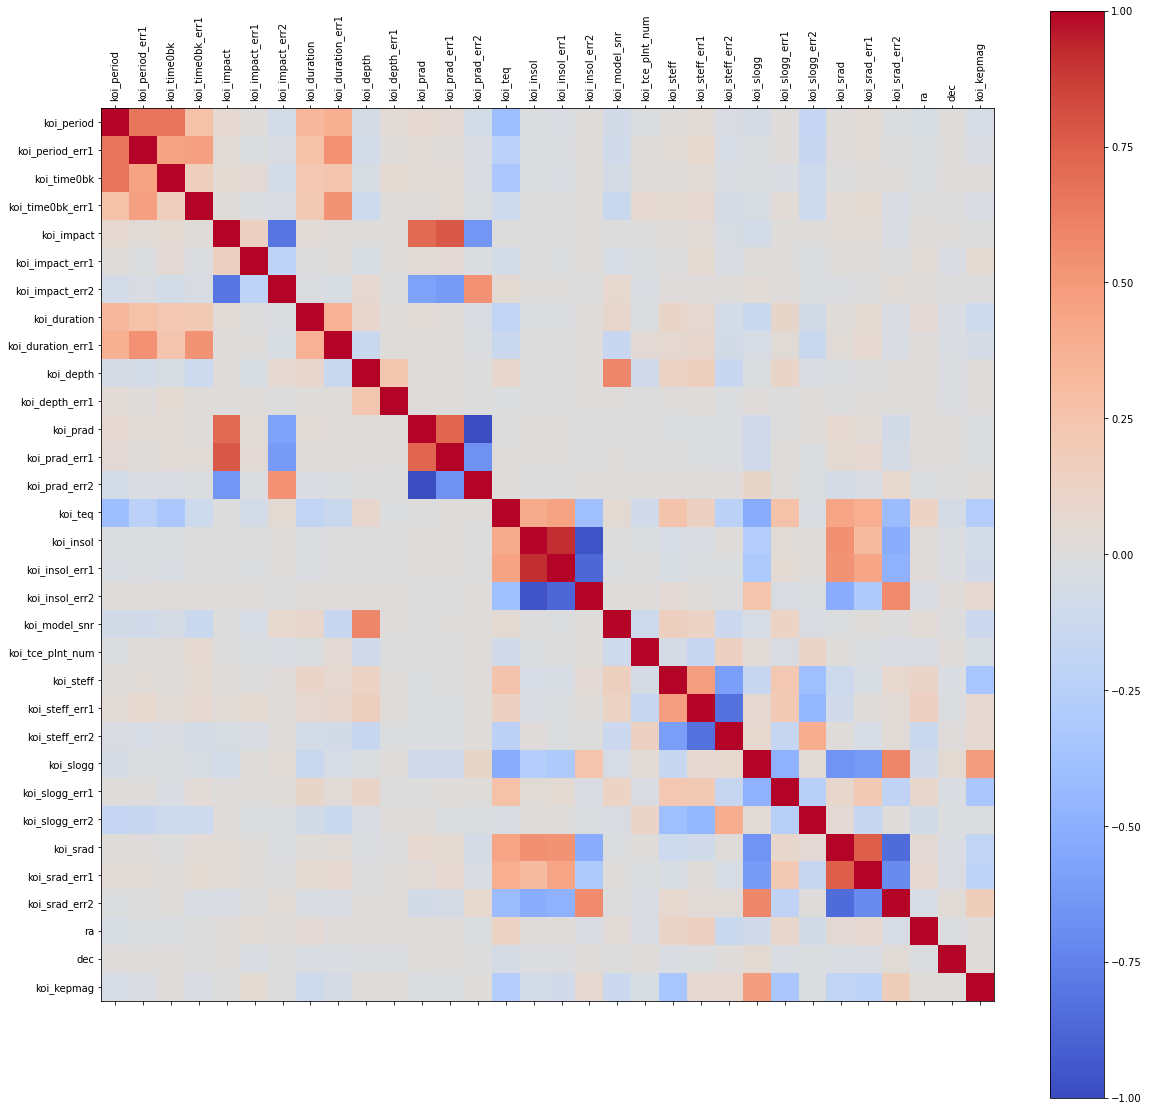

In [9]:
corr = exoplanets.corr()
# display(corr)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr))
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()


Veamos como es el promedio de las features para cada categoría

In [10]:
alt.Chart(exoplanets).mark_bar().encode(
    alt.X('koi_disposition' , title="Disposición KOI"),
    alt.Y(alt.repeat("column"), aggregate="mean", type='quantitative')
).properties( 
    width=300,
    height=400
).repeat(
    column=exoplanets.columns.to_numpy()[1:5]
)

alt.RepeatChart(...)

Podemos identificar diferencias notorias en algunas categorías entre los falsos negativos y confirmados.

Veamos que pasa al ver los histogramas para algunas categoría

In [11]:
alt.Chart(exoplanets).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X(alt.repeat("row"), type='quantitative', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
    alt.Color('koi_disposition:N')
).properties( 
    width=700,
    height=550
).repeat(
    row=["koi_steff","koi_steff_err1","koi_steff_err2","koi_slogg","ra","dec","koi_prad"]
)

alt.RepeatChart(...)

Podemos ver que en estas categorías no se pueden ver diferencias notorias entre exoplanetas confirmados, candidatos y falsos positivos.

Pero por ejemplo para lo siguiente

In [12]:
for cat in exoplanets.koi_disposition.unique():
    alt.Chart(exoplanets[exoplanets['koi_disposition']==cat],title=cat).mark_circle(opacity=0.35).encode(
    alt.X('koi_srad', type='quantitative',scale=alt.Scale(domain=[0, 180]) , title="Radio estelar"),
    alt.Y('koi_slogg', type='quantitative', title= "Gravedad de la superficie estelar")    
    ).properties(
    width=700,
    height=400
).display()


alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

Se puede ver una diferencia entre confirmados y falsos positivos.

# Balanceo de datos

In [13]:
exoplanets["koi_disposition"].value_counts()

FALSE POSITIVE    4358
CONFIRMED         2272
CANDIDATE         2114
Name: koi_disposition, dtype: int64

In [14]:
alt.Chart(exoplanets).mark_bar().encode(
    x='koi_disposition',
    y=alt.Y('count(koi_disposition)', title= "Cantidad") 
).properties(
    width=220,
    height=350
)

alt.Chart(...)

In [15]:
from sklearn.utils import resample

confirmado = exoplanets[exoplanets.koi_disposition   =='CONFIRMED']
falso = exoplanets[exoplanets.koi_disposition   =='FALSE POSITIVE']
candidato=exoplanets[exoplanets.koi_disposition   =='CANDIDATE']

In [16]:
# # Upsample minority class
confirmado_upsampled = resample(confirmado, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(falso),    # to match majority class
                                 random_state=42) # reproducible results

In [17]:
exoplanets= pd.concat([falso,confirmado_upsampled])

In [18]:
alt.Chart(exoplanets).mark_bar().encode(
    x='koi_disposition',
    y='count(koi_disposition)'
).properties(
    width=220,
    height=350
)

alt.Chart(...)

In [19]:
X=exoplanets.drop('koi_disposition', axis =1)
y=exoplanets['koi_disposition']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [47]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Selección de modelo 

### k-Nearest Neighbors (k-NN)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
knn_grid = {"n_neighbors": np.arange(2, 20)}

knn_cv = GridSearchCV(
    estimator=knn,
    param_grid=knn_grid,
    n_jobs=-1
)

In [62]:
knn_cv.fit(X_train_scaled, y_train)         

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [63]:
print(knn_cv.best_score_)

0.8516137523427135


In [64]:
print(knn_cv.best_params_)

{'n_neighbors': 3}


Text(0.5, 1.0, 'Matriz de confusión K-NN')

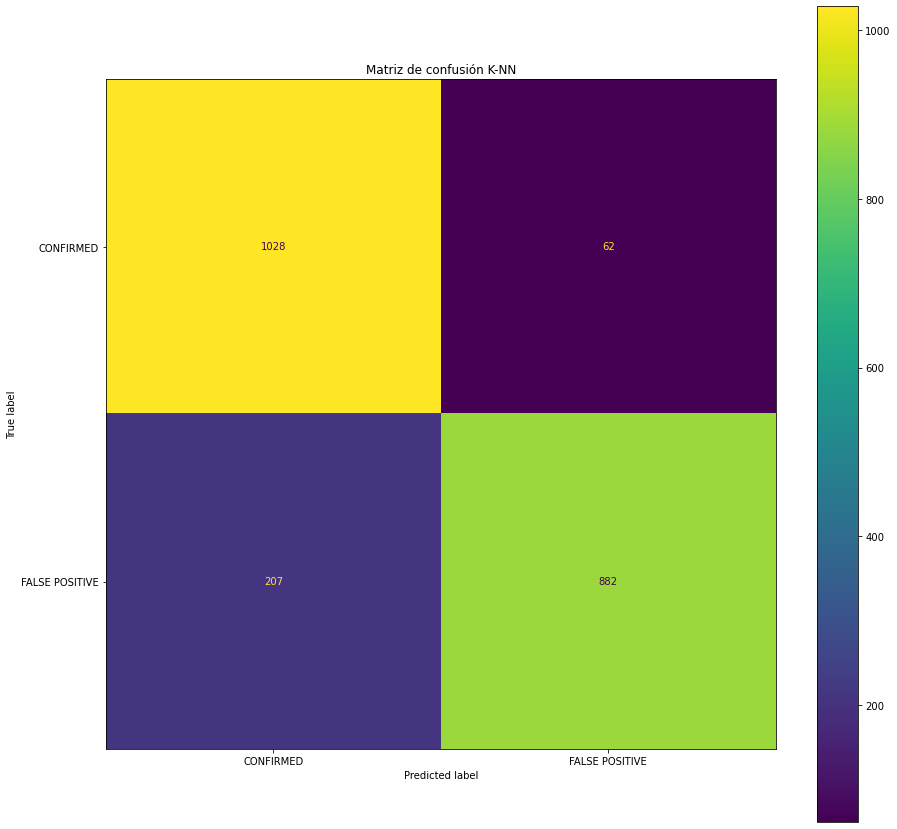

In [65]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
y_pred=knn_cv.predict(X_test_scaled)
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(knn_cv,X_test_scaled,y_test, ax=ax).ax_.set_title("Matriz de confusión K-NN")

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

     CONFIRMED       0.83      0.94      0.88      1090
FALSE POSITIVE       0.93      0.81      0.87      1089

      accuracy                           0.88      2179
     macro avg       0.88      0.88      0.88      2179
  weighted avg       0.88      0.88      0.88      2179



### Support-vector machines (SVM)

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

model_svc = SVC(kernel='rbf')
model_svc.fit(X_train_scaled, y_train)

SVC()

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid_svc = {'C': [1, 5, 10, 50,100,1000],
                 'gamma': [0.0001, 0.0005, 0.001, 0.005,0.01,0.1]}
grid_search_svc = GridSearchCV(model_svc, param_grid_svc, verbose=3,n_jobs=-1)

In [57]:
grid_search_svc.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   50.1s finished


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50, 100, 1000],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]},
             verbose=3)

In [58]:
print(grid_search_svc.best_score_)

0.9224411484619399


In [59]:
print(grid_search_svc.best_params_)

{'C': 1000, 'gamma': 0.1}


Text(0.5, 1.0, 'Matriz de confusión SVM')

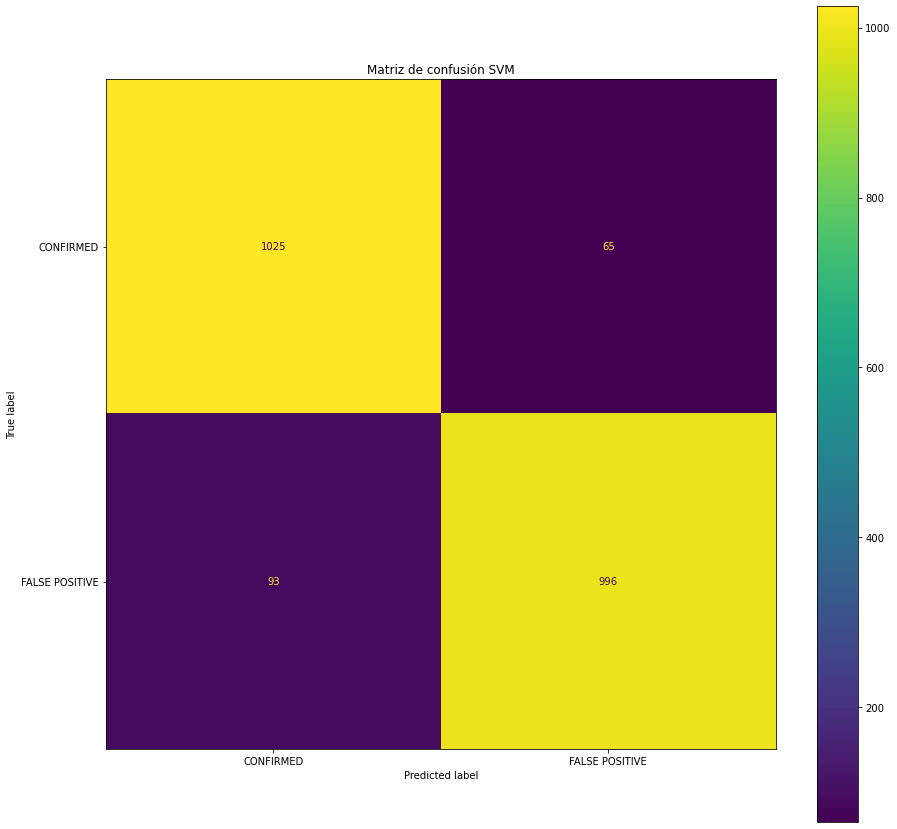

In [60]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
y_pred=grid_search_svc.predict(X_test_scaled)
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(grid_search_svc,X_test_scaled,y_test , ax=ax).ax_.set_title("Matriz de confusión SVM")

In [61]:
# Make predictions with the hypertuned model
predictions = grid_search_svc.predict(X_test_scaled)

# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

     CONFIRMED       0.92      0.94      0.93      1090
FALSE POSITIVE       0.94      0.91      0.93      1089

      accuracy                           0.93      2179
     macro avg       0.93      0.93      0.93      2179
  weighted avg       0.93      0.93      0.93      2179



### Random forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
randomf=RandomForestClassifier()
randomf_grid = {
    'max_depth': [110, 150, 200, 250],
    'n_estimators': [250, 300, 350, 500]
}
randomf_search = GridSearchCV(randomf, randomf_grid,  cv = 3, n_jobs = -1, verbose = 2)

In [83]:
randomf_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   46.4s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [110, 150, 200, 250],
                         'n_estimators': [250, 300, 350, 500]},
             verbose=2)

In [80]:
randomf_search.best_score_

0.9593085513232369

In [81]:
print(randomf_search.best_params_)

{'max_depth': 200, 'n_estimators': 500}


Text(0.5, 1.0, 'Matriz de confusión Random Forest')

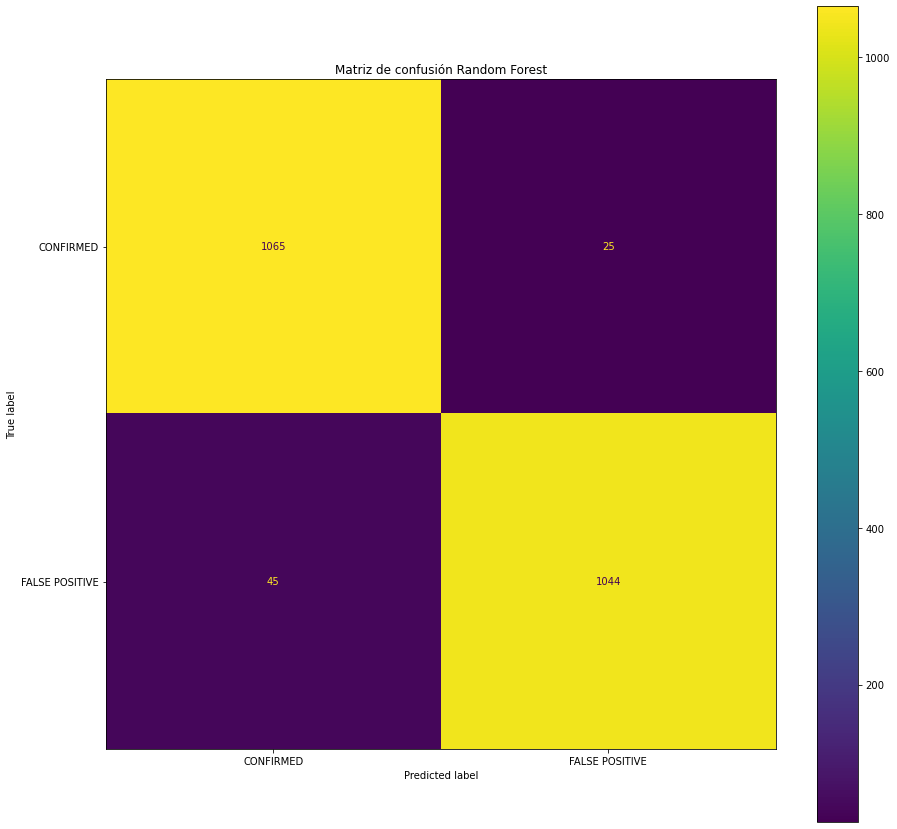

In [66]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
y_pred=randomf_search.predict(X_test_scaled)
fig, ax = plt.subplots(figsize=(15, 15))
confusion_matrix(y_test, y_pred)  #
plot_confusion_matrix(randomf_search,X_test_scaled,y_test, ax=ax).ax_.set_title("Matriz de confusión Random Forest")

In [67]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

     CONFIRMED       0.96      0.98      0.97      1090
FALSE POSITIVE       0.98      0.96      0.97      1089

      accuracy                           0.97      2179
     macro avg       0.97      0.97      0.97      2179
  weighted avg       0.97      0.97      0.97      2179



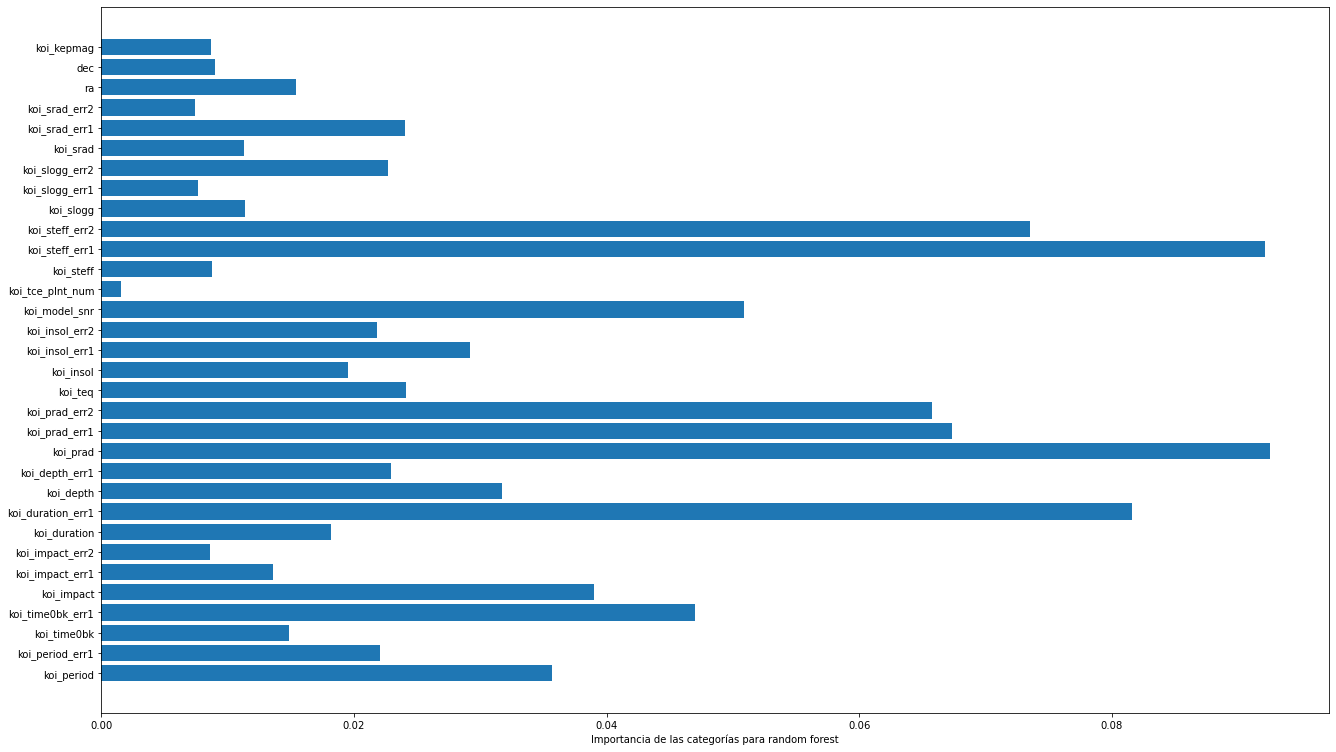

In [80]:
D=dict(zip(X.columns,randomf_search.best_estimator_.feature_importances_))

fig=plt.figure(figsize=(22,13))
plt.barh(range(len(D)), list(D.values()), align='center')
plt.yticks(range(len(D)), list(D.keys()))
plt.xlabel("Importancia de las categorías para random forest")
plt.show()

### Gradient boosting

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
gradient= GradientBoostingClassifier(random_state=42)
gradient_grid =  {
    'max_features':[2,3,4,5,6,7],
    'learning_rate': [0.001,0.1, 0.05, 0.01,0.2],
    'subsample': [0.8],
    'n_estimators': [100,250, 300, 500,1000]
}

gradient_cv = GridSearchCV(
    estimator=gradient,
    param_grid=gradient_grid,
    n_jobs=-1
)

In [82]:
gradient_cv.fit(X_train_scaled, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 0.05, 0.01, 0.2],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [100, 250, 300, 500, 1000],
                         'subsample': [0.8]})

In [83]:
print(gradient_cv.best_score_)

0.9642040389434449


In [84]:
print(gradient_cv.best_params_)

{'learning_rate': 0.2, 'max_features': 7, 'n_estimators': 1000, 'subsample': 0.8}


Text(0.5, 1.0, 'Matriz de confusión Gradient boosting')

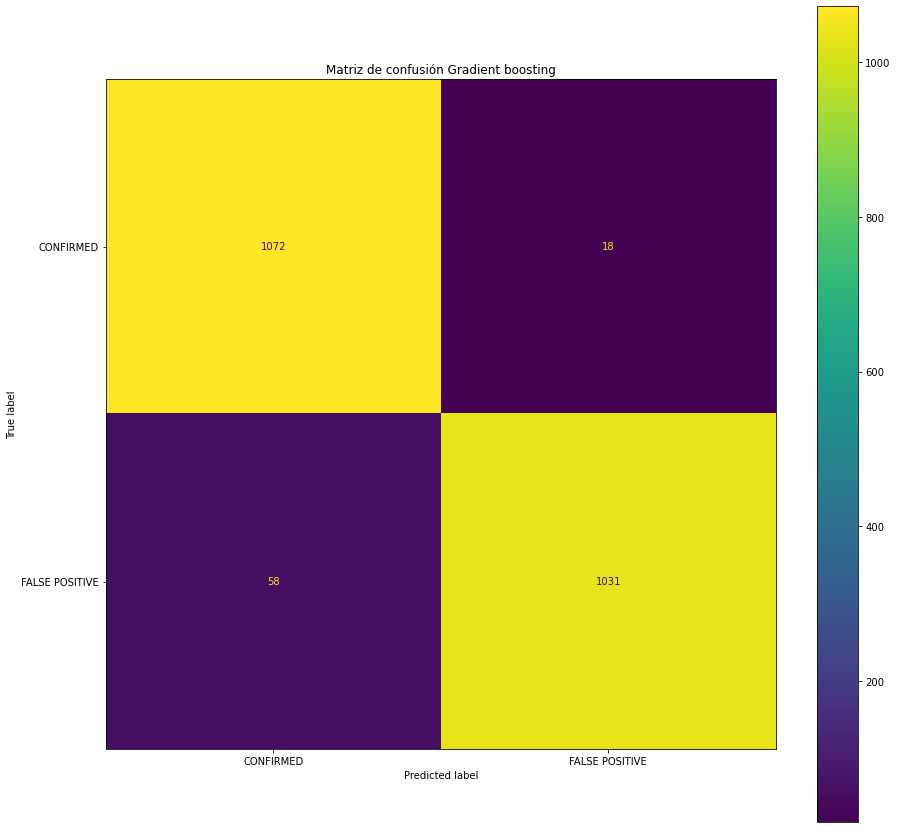

In [85]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
y_pred=gradient_cv.predict(X_test_scaled)
fig, ax = plt.subplots(figsize=(15, 15))
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(gradient_cv,X_test_scaled,y_test, ax=ax).ax_.set_title("Matriz de confusión Gradient boosting")

In [86]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

     CONFIRMED       0.95      0.98      0.97      1090
FALSE POSITIVE       0.98      0.95      0.96      1089

      accuracy                           0.97      2179
     macro avg       0.97      0.97      0.97      2179
  weighted avg       0.97      0.97      0.97      2179



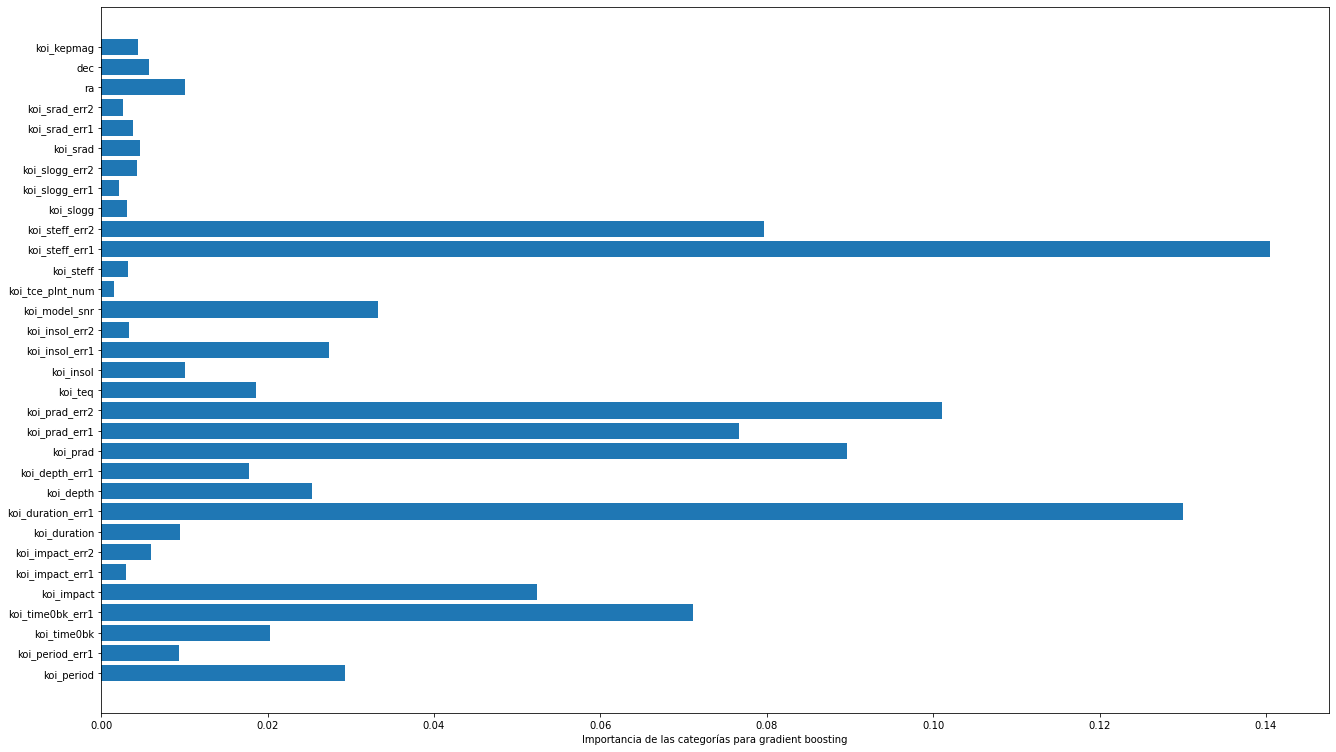

In [87]:
D=dict(zip(X.columns,gradient_cv.best_estimator_.feature_importances_))

fig=plt.figure(figsize=(22,13))
plt.barh(range(len(D)), list(D.values()), align='center')
plt.yticks(range(len(D)), list(D.keys()))
plt.xlabel("Importancia de las categorías para gradient boosting")


plt.show()

## Conclusiones 

* El método que tuvo el mejor score fue Gradient Boosting
* La diferencia entre los métodos de ensamble y el resto es clara
* Estos métodos poseen un "score" asociado
* Este score puede ser útil para tener una idea en el estudio de los candidatos
* A pesar de que gradient boosting fuera el método mejor calificado, su tiempo de ejecución y uso de recursos es considerablemente mayor en comparación a los otros modelos. Como por ejemplo random forest que tiene un desempeño similar con un menor tiempo de ejecución.  

A pesar de las altas precisiones entregadas por los modelos, sobre todo de gradient boosting y random forest, para los estándares de la NASA esto es insuficiente, ya que para ellos, un nuevo descubrimiento debe tener un nivel de confianza mínimo de 99,9999%.

## Bibliografía

* https://www.kaggle.com/nasa/kepler-exoplanet-search-results/
* https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html